<a href="https://colab.research.google.com/github/tintubiel/MSU-HSE-Courses/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
%matplotlib inline
COLLAB = True

if COLLAB:
    from google.colab import drive
    drive.mount('/content/gdrive')
    df = pd.read_csv("/content/gdrive/MyDrive/DA/1/data.tsv", sep="\t", header=0, names = ("query", "ts", "ui"))
else:
    df = pd.read_csv("data.tsv", sep="\t", header=0, names = ("query", "ts", "ui"))
df.head()
df.info()

Mounted at /content/gdrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203823 entries, 0 to 1203822
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   query   1203823 non-null  object
 1   ts      1203823 non-null  int64 
 2   ui      1203823 non-null  object
dtypes: int64(1), object(2)
memory usage: 27.6+ MB


В файле data.tsv лежит семпл запросов к Яндекс картинкам за несколько недель.

 * query - текст запроса
 * ts - дата и время
 * ui - платформа

# 1. Выведите топ10 самых частотных запросов в каждой платформе (desktop, touch). Какие отличия вы видите?

In [2]:
print(df[df["ui"]=="desktop"]["query"].value_counts().head(10))
print("______________________")
print(df[df["ui"]=="touch"]["query"].value_counts().head(10))

календарь 2021                     2804
таблица менделеева                 2631
картинки                           1647
порно                              1342
английский алфавит                 1293
обои на рабочий стол               1143
Одноклассники (социальная сеть)    1116
секс                                895
таблица квадратов                   877
алфавит                             874
Name: query, dtype: int64
______________________
порно                      7740
секс                       6348
с днём рождения женщине    4903
с днём рождения            3967
с днём рождения мужчине    3623
хентай                     3157
с днем рождения            3005
xxx                        2429
Порно                      2330
календарь 2021             2237
Name: query, dtype: int64


Мобильные устройства преимущественно используются для поиска контента 18+ и, в целом, количество запросов с мобильных устройств больше,  в свою очередь десктоп используется чаще для поиска какой-то иной, нужной информации, но контент 18+ ищут и при помощи десктопа тоже

# 2. Посмотрите гистограммы времени запросов, чем отличается трафик запросов в течении дня для двух платформ?

 * столбец 'ts' преобразовать в datetime с помощью pd.to_datetime(d_df['ts'], unit='s')
 * время перевести в часы

<Axes: >

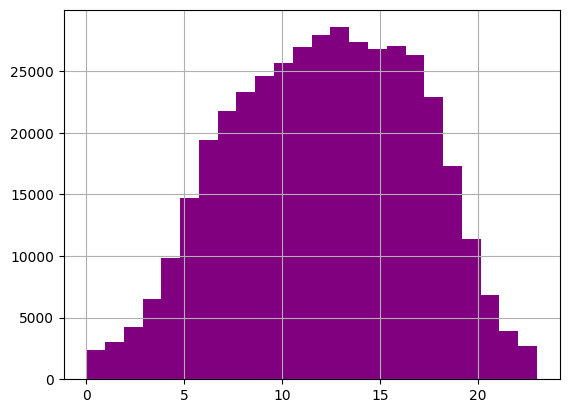

In [12]:
df["ts"] = pd.to_datetime(df['ts'], unit='s')
df["hours"] = df["ts"].dt.hour
df[df["ui"]=="desktop"]["hours"].hist(bins=24, color='purple')

<Axes: >

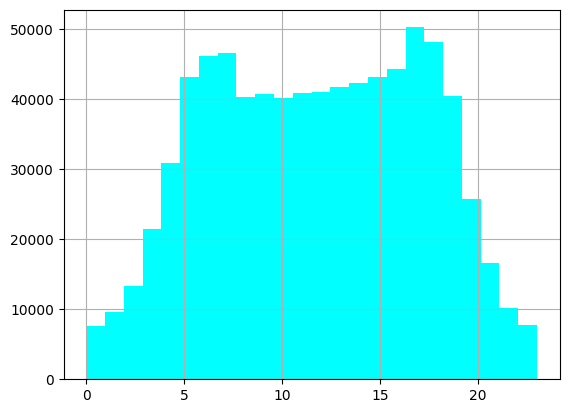

In [13]:
df[df["ui"]=="touch"]["hours"].hist(bins=24,color='cyan')

Наиболее частые запросы с десктопов поступают в районе 12 часов, после достижения этого времени количество запросов в час снижается, тогда как пик запросов на мобильных устройствах в 7-8 часов, затем идет падение активности и медленное возрастание к 17-18 часам, где мы наблюдаем второй пик ативности.

# 3. Вычислите для времени запросов по темам для каждой платформы:
 * среднее и медиану
 * СКО
 * 95 % квантиль

    

In [5]:
print(df[df["ui"]=="desktop"].groupby('query')["hours"].agg(['mean','median',"std"]))

                         mean  median       std
query                                          
+18                 13.272727    15.0  4.027180
+18 video           19.000000    19.0  4.242641
002                  8.250000     6.0  7.088723
02 аниме            14.411765    15.0  3.285576
02 милый во франсе  12.428571    11.0  5.191568
...                       ...     ...       ...
ёжик в тумане       11.928571    10.5  6.170205
ёжики               11.909091    13.0  5.448937
سكس                 13.000000    15.0  8.876936
幼女                   8.000000     8.0  7.071068
보지                   5.333333     5.0  0.577350

[23956 rows x 3 columns]


In [6]:
print(df[df["ui"]=="touch"].groupby('query')["hours"].agg(['mean','median',"std"]))

                         mean  median       std
query                                          
+18                 13.764706    14.0  5.268884
+18 video           15.166667    16.0  3.886058
002                 14.600000    16.0  4.702583
02 аниме            14.533333    15.0  4.199617
02 милый во франсе  12.347826    15.0  5.936089
...                       ...     ...       ...
سكس                 15.142857    17.0  6.269631
幼女                  10.428571    12.5  6.790426
视频                  12.333333    14.0  5.935107
보지                  10.461538    12.0  5.253814
🍑                   13.708333    13.5  5.352603

[25544 rows x 3 columns]


In [7]:
df[df["ui"]=="desktop"].groupby('query')["hours"].quantile(.95)

query
+18                   16.50
+18 video             21.70
002                   16.65
02 аниме              18.35
02 милый во франсе    19.10
                      ...  
ёжик в тумане         20.05
ёжики                 18.00
سكس                   21.00
幼女                    12.50
보지                     5.90
Name: hours, Length: 23956, dtype: float64

In [8]:
df[df["ui"]=="touch"].groupby('query')["hours"].quantile(.95)

query
+18                   21.70
+18 video             20.70
002                   20.30
02 аниме              19.55
02 милый во франсе    19.00
                      ...  
سكس                   22.00
幼女                    18.35
视频                    21.60
보지                    16.80
🍑                     20.85
Name: hours, Length: 25544, dtype: float64

# 4. Создать сводную таблицу кол-ва общих запросов по двум платформам

 * Желательно использовать функцию merge ()

In [9]:
desktop = df[df.ui=='desktop'][['query', 'ui']].groupby('query').count()
touch = df[df.ui=='touch'][['query', 'ui']].groupby('query').count()
result = pd.merge(desktop, touch, how= 'inner', on = "query")

In [10]:
result.columns = ["desktop", "touch"]
result.sort_values(by="desktop", ascending=False)

,desktop,touch
query,,
календарь 2021,2804,2237
таблица менделеева,2631,2097
картинки,1647,1658
порно,1342,7740
английский алфавит,1293,1689
...,...,...
грибы зонтики съедобные,1,16
порно порно ролики,1,13
грибы рядовки,1,16


In [11]:
result.head()

,desktop,touch
query,,
+18,11,34
+18 video,2,24
002,4,15
02 аниме,34,30
02 милый во франсе,7,23
